In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project/train_final.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/kaggle/input/project/train_final.csv')

In [4]:
data.head()

,customer_ID,D_39,B_2,B_5,D_48,B_6,B_8,B_10,S_5,S_6,...,D_128,D_129,D_130,D_139,target,D_63_CO,D_63_CR,D_64_O,D_64_R,D_64_U
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.009119,1.007647,0.231717,0.192376,0.149564,0.002927,0.326101,0.034643,0.001770,...,0.999737,1.008523,0.004186,0.007186,0,0,1,1,0,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.178126,1.004028,0.027000,0.014696,0.167634,0.000974,0.297130,0.043929,0.002911,...,0.999252,0.001777,0.002202,0.002980,0,1,0,1,0,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.009704,0.812650,0.001557,0.080370,0.183628,0.000247,0.296313,0.001824,1.002366,...,0.008331,0.004189,0.002654,0.007383,0,1,0,0,1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.001083,1.006183,0.118818,0.013057,0.174331,1.005561,0.411625,0.022970,0.001113,...,1.002652,1.001869,0.000060,0.002704,0,1,0,1,0,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.005573,0.815746,0.004855,0.325121,0.048857,1.005185,0.125195,0.009350,1.007410,...,1.006172,1.008584,1.006119,0.002974,0,1,0,1,0,0


In [5]:
# Drop 'customer_ID' and 'target' columns to create the features (X) array
X = data.drop(columns=['customer_ID', 'target'])

# Extract 'target' column as the target (y) array
y = data['target']

# Print the shapes of X and y arrays
print('X shape:', X.shape)
print('y shape:', y.shape)


X shape: (458913, 57)
y shape: (458913,)


In [6]:
X

,D_39,B_2,B_5,D_48,B_6,B_8,B_10,S_5,S_6,B_12,...,D_126,D_128,D_129,D_130,D_139,D_63_CO,D_63_CR,D_64_O,D_64_R,D_64_U
0,0.009119,1.007647,0.231717,0.192376,0.149564,0.002927,0.326101,0.034643,0.001770,0.112294,...,1.0,0.999737,1.008523,0.004186,0.007186,0,1,1,0,0
1,0.178126,1.004028,0.027000,0.014696,0.167634,0.000974,0.297130,0.043929,0.002911,0.019050,...,1.0,0.999252,0.001777,0.002202,0.002980,1,0,1,0,0
2,0.009704,0.812650,0.001557,0.080370,0.183628,0.000247,0.296313,0.001824,1.002366,0.007158,...,1.0,0.008331,0.004189,0.002654,0.007383,1,0,0,1,0
3,0.001083,1.006183,0.118818,0.013057,0.174331,1.005561,0.411625,0.022970,0.001113,0.074835,...,1.0,1.002652,1.001869,0.000060,0.002704,1,0,1,0,0
4,0.005573,0.815746,0.004855,0.325121,0.048857,1.005185,0.125195,0.009350,1.007410,0.013041,...,1.0,1.006172,1.008584,1.006119,0.002974,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.447585,1.009867,0.040532,0.058638,0.317123,1.006013,0.436133,0.261584,0.000034,0.284535,...,1.0,0.004271,0.000556,0.006699,0.007917,1,0,0,0,1
458909,0.033670,0.055656,0.018681,0.171329,0.011520,0.004752,0.021009,0.009719,1.002765,0.007532,...,1.0,0.999267,0.007760,1.005134,0.004393,1,0,0,1,0
458910,0.267018,1.007023,0.019537,0.114409,0.190044,1.001786,0.302660,0.026269,0.000084,0.048887,...,1.0,1.007510,1.005795,0.003907,0.006035,1,0,0,0,1
458911,0.008619,0.714486,0.020531,0.349058,0.018122,1.005036,0.035461,0.009775,0.001728,0.009679,...,1.0,0.004191,0.002378,1.001044,1.009893,1,0,0,0,1


In [7]:
y

0         0
1         0
2         0
3         0
4         0
         ..
458908    0
458909    0
458910    0
458911    1
458912    0
Name: target, Length: 458913, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (367130, 57)
y_train shape: (367130,)
X_test shape: (91783, 57)
y_test shape: (91783,)


In [10]:
from sklearn.svm import SVC

In [11]:

classifier = SVC(kernel = 'rbf',C=10, random_state = 0)


## Used Random Search to get hyperparameter for SVM model
## kernel = 'rbf'
## C = 10
## gamma = 'scale'

In [12]:
import time
st = time.time()
classifier.fit(X_train, y_train)
et = time.time()


In [13]:
print(et-st)

6708.295832633972


## Time taken to fit the model = 6708.295832633972 Seconds

In [14]:
classifier.score(X_test, y_test)

0.8794548009980062

# Accuracy = 87.94%

In [18]:
st_p = time.time()
y_pred = classifier.predict(X_test)
et_p = time.time()

In [19]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [20]:
print(et_p - st_p)

1075.625519990921


## Time taken to predict to predict 91783 test rows =  1075.625519990921 seconds
## Either write this in report for single prediction or bunch.

# Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     67863
           1       0.80      0.72      0.76     23920

    accuracy                           0.88     91783
   macro avg       0.85      0.83      0.84     91783
weighted avg       0.88      0.88      0.88     91783



# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63466,  4397],
       [ 6667, 17253]])

Text(95.72222222222221, 0.5, 'Truth')

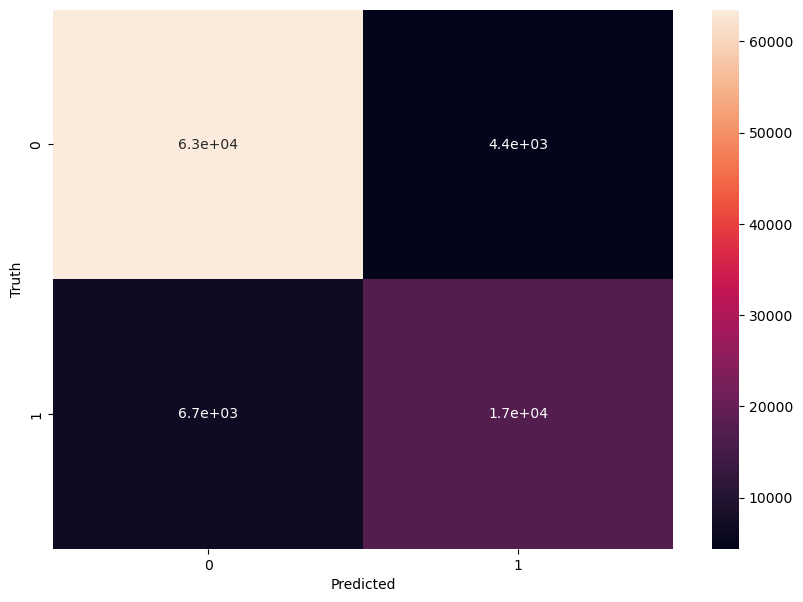

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')